# Analyzing Product Co-Purchasing Behavior in E-Commerce Using Network Data

### Stakeholder Question
Question:
What products are frequently bought together, and which products are central to customer shopping habits?

## Data Collection:

The data from Kaggle’s Amazon Product Dataset. Since the data was readily available, no external tools such as requests or BeautifulSoup were required. I used Python’s pandas library to load the CSV files and process them for analysis.

### Data Ingestion

In [36]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np


In [84]:
orders = pd.read_csv('orders.csv')
orders_products = pd.read_csv('order_products_prior.csv')
products = pd.read_csv('products.csv')
departments = pd.read_csv('departments.csv')

In [56]:
orders_products = orders_products[['order_id', 'product_id']]

### Group orders bought in the same group

In [58]:
order_groups = orders_products.groupby('order_id')['product_id'].apply(list)
print(order_groups.head(10))

order_id
2     [33120, 28985, 9327, 45918, 30035, 17794, 4014...
3     [33754, 24838, 17704, 21903, 17668, 46667, 174...
4     [46842, 26434, 39758, 27761, 10054, 21351, 225...
5     [13176, 15005, 47329, 27966, 23909, 48370, 132...
6                                 [40462, 15873, 41897]
7                                        [34050, 46802]
8                                               [23423]
9     [21405, 47890, 11182, 2014, 29193, 34203, 1499...
10    [24852, 4796, 31717, 47766, 4605, 1529, 21137,...
11                    [30162, 27085, 5994, 1313, 31506]
Name: product_id, dtype: object


### Create Graph

In [59]:

edges = []
for products_in_order in order_groups:
    for pair in combinations(products_in_order, 2):
        edges.append(pair)

In [60]:
G = nx.Graph()

In [61]:
for pair in edges:
    if G.has_edge(pair[0], pair[1]):
        G[pair[0]][pair[1]]['weight'] += 1
    else:
        G.add_edge(pair[0], pair[1], weight=1)

### Degree and page rank centrality

In [65]:
#Degree and page rank centrality
degree_centrality = nx.degree_centrality(G)
pagerank_centrality = nx.pagerank(G)

#### Degree Centrality

In [66]:
#top 5 products
top_5_products = sorted(degree_centrality.items(),key=lambda x: x[1], reverse=True)[:5]

In [67]:
#Get product name
top_5_product_names = products.set_index('product_id').loc[[x[0] for x in top_5_products]]['product_name'].values

In [68]:
print(top_5_product_names)

['Banana' 'Strawberries' 'Bag of Organic Bananas' 'Large Lemon' 'Limes']


In [69]:
print("Top 5 Products by Degree Centrality:")
for name, score in zip(top_5_product_names, [x[1] for x in top_5_products]):
    print(f"{name}: {score}")

Top 5 Products by Degree Centrality:
Banana: 0.860407062186701
Strawberries: 0.7211160992893524
Bag of Organic Bananas: 0.7179956918245324
Large Lemon: 0.6873150403639804
Limes: 0.670303786765446


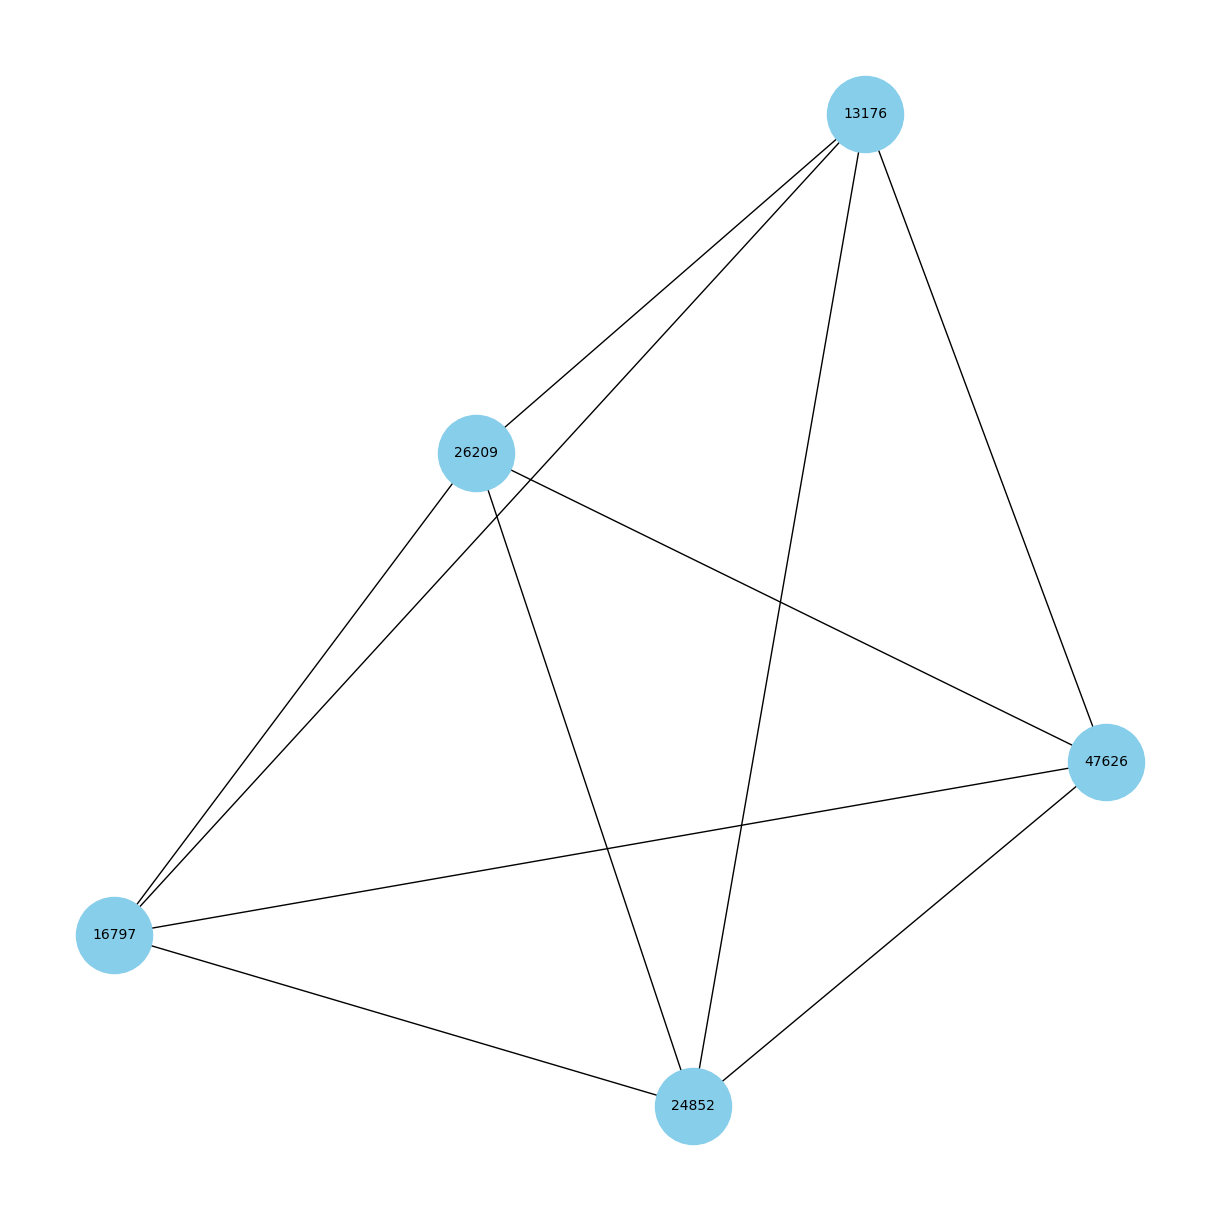

In [70]:
plt.figure(figsize=(12,12))
subgraph = G.subgraph([x[0] for x in top_5_products])
nx.draw(subgraph, with_labels=True, node_color='skyblue', node_size=3000, font_size=10)
plt.show()

#### Pagerank centrality

In [72]:
page_rank_centrality = sorted(pagerank_centrality.items(),key=lambda x: x[1], reverse=True)[:5]

In [73]:
page_rank_product_names = products.set_index('product_id').loc[[x[0] for x in page_rank_centrality]]['product_name'].values

In [74]:
print(page_rank_product_names)

['Banana' 'Bag of Organic Bananas' 'Organic Strawberries'
 'Organic Baby Spinach' 'Organic Hass Avocado']


In [78]:
print('Top 5 products by Page rank centrality')

for name, score in zip(page_rank_product_names, [x[1] for x in page_rank_centrality]):
    print(f"{name}: {score}")

Top 5 products by Page rank centrality
Banana: 0.010777814912912433
Bag of Organic Bananas: 0.007321202691565594
Organic Strawberries: 0.0054833498258173505
Organic Baby Spinach: 0.0048175826179615786
Organic Hass Avocado: 0.004523428245980121


## Section 2

In [98]:
top_15_products = sorted(degree_centrality.items(),key=lambda x: x[1], reverse=True)[:100]

In [99]:
top_15_product_ids = [product[0] for product in top_15_products]

# Get product names and department IDs for the top 15 products
top_15_product_data = products.set_index('product_id').loc[top_15_product_ids]

# Now extract product names and department IDs
top_15_product_names = top_15_product_data['product_name'].values
top_15_product_dep = top_15_product_data['department_id'].values

# Get department names by merging with departments DataFrame
top_15_product_departments = [products.loc[products['product_id'] == x[0], 'department_id'].values[0] for x in top_15_products]
top_15_product_department_names = [departments.loc[departments['department_id'] == dept_id, 'department'].values[0] for dept_id in top_15_product_departments]

In [100]:
print("Top 15 Products by Degree Centrality and Department:")
for name, score, dept in zip(top_15_product_names, [x[1] for x in top_15_products], top_15_product_department_names):
    print(f"{name} (Department: {dept}): {score:.4f}")

Top 15 Products by Degree Centrality and Department:
Banana (Department: produce): 0.8604
Strawberries (Department: produce): 0.7211
Bag of Organic Bananas (Department: produce): 0.7180
Large Lemon (Department: produce): 0.6873
Limes (Department: produce): 0.6703
Organic Strawberries (Department: produce): 0.6641
Organic Blueberries (Department: produce): 0.6303
Blueberries (Department: frozen): 0.6149
Cucumber Kirby (Department: produce): 0.6140
Organic Raspberries (Department: produce): 0.6124
Organic Avocado (Department: produce): 0.6122
Organic Fuji Apple (Department: produce): 0.6093
100% Whole Wheat Bread (Department: bakery): 0.6050
Seedless Red Grapes (Department: produce): 0.6040
Organic Hass Avocado (Department: produce): 0.5968
Organic Blackberries (Department: produce): 0.5743
Extra Virgin Olive Oil (Department: pantry): 0.5668
Organic Baby Spinach (Department: produce): 0.5661
Yellow Onions (Department: produce): 0.5629
Asparagus (Department: produce): 0.5572
Roma Tomato (